## 補足　3クラス潜在変数モデル

<a href="https://colab.research.google.com/github/makaishi2/python_bayes_intro/blob/main/sample-notebooks/A_3%E3%82%AF%E3%83%A9%E3%82%B9%E6%BD%9C%E5%9C%A8%E5%A4%89%E6%95%B0%E3%83%A2%E3%83%87%E3%83%AB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### 共通処理

In [1]:
#%matplotlib inline
# 日本語化ライブラリ導入
#!pip install japanize-matplotlib | tail -n 1

In [2]:
# ライブラリのimport

# NumPy用ライブラリ
import numpy as np

# Matplotlib中のpyplotライブラリのインポート
import matplotlib.pyplot as plt

# matplotlib日本語化対応ライブラリのインポート
import japanize_matplotlib

# pandas用ライブラリ
import pandas as pd

# データフレーム表示用関数
from IPython.display import display

# seaborn
import seaborn as sns

# 表示オプション調整

# NumPy表示形式の設定
np.set_printoptions(precision=3, floatmode='fixed')

# グラフのデフォルトフォント指定
plt.rcParams["font.size"] = 14

# サイズ設定
plt.rcParams['figure.figsize'] = (6, 6)

# 方眼表示ON
plt.rcParams['axes.grid'] = True

# データフレームでの表示精度
pd.options.display.float_format = '{:.3f}'.format

# データフレームですべての項目を表示
pd.set_option("display.max_columns",None)

In [3]:
import pymc as pm
import arviz as az

print(f"Running on PyMC v{pm.__version__}")
print(f"Running on ArViz v{az.__version__}")

Running on PyMC v5.11.0
Running on ArViz v0.17.1


### A.1 カテゴリカル分布

#### 確率モデル定義

In [4]:
# パラメータ設定
p = [0.2, 0.5, 0.3]

model1 = pm.Model()
with model1:
    # pm.Categorical: カテゴリカル分布
    # p: 各要素の発生確率
    x = pm.Categorical('x', p=p)

#### 事前分布のサンプリングとサンプル値抽出

In [5]:
with model1:
    # 事前分布のサンプリング
    prior_samples1 = pm.sample_prior_predictive(random_seed=42)

x_samples1 = prior_samples1['prior']['x'].values
print(x_samples1)

Sampling: [x]


[[2 2 2 1 2 0 2 2 0 1 1 0 1 2 1 0 2 0 2 1 0 1 2 2 0 1 0 1 2 2 1 1 0 1 2 1
  0 2 1 0 1 2 1 0 2 2 1 0 0 1 1 1 1 2 2 1 2 1 2 1 2 2 1 1 2 1 1 0 0 1 0 1
  0 0 1 1 1 2 1 2 0 0 2 1 0 1 1 1 1 1 1 1 0 1 1 0 1 2 1 1 1 2 1 2 2 2 0 2
  2 2 0 2 1 1 0 2 1 1 1 2 1 1 2 2 2 0 2 1 2 1 2 2 1 2 2 1 1 1 2 1 1 1 2 1
  1 2 0 2 1 2 1 0 2 2 1 2 1 2 2 1 0 2 1 1 1 1 0 0 1 0 1 2 0 1 1 0 1 2 2 1
  1 0 1 1 1 2 1 1 1 1 1 1 0 1 0 0 1 1 2 0 2 2 1 1 1 1 1 0 1 1 1 2 2 1 1 2
  1 1 2 1 0 1 1 2 2 2 2 1 2 1 1 1 1 0 2 1 0 1 1 2 2 1 2 0 2 1 1 1 1 2 1 2
  1 0 1 2 1 1 1 0 2 1 2 1 1 2 1 1 1 2 1 0 1 1 2 1 1 1 0 0 0 1 0 2 2 2 0 1
  1 1 0 2 1 0 0 1 2 2 1 1 0 1 2 2 1 1 1 1 0 2 1 2 2 2 1 1 1 0 1 1 1 1 2 0
  1 1 1 0 2 1 0 1 2 0 1 1 1 0 0 1 0 1 1 1 1 2 1 1 0 1 2 2 1 1 0 1 2 2 2 1
  2 1 2 1 0 2 1 0 1 1 2 1 0 0 1 0 2 2 1 2 1 1 0 0 0 2 2 1 1 0 1 1 2 1 1 1
  1 0 1 2 1 2 1 1 0 1 1 1 2 0 0 2 1 1 2 2 1 2 0 2 2 1 1 2 1 2 2 1 1 1 2 1
  2 0 0 1 1 1 2 1 1 1 1 1 1 0 2 1 0 1 2 0 1 1 1 2 1 2 1 0 2 0 2 2 1 1 0 2
  0 1 1 0 0 2 1 1 1 2 2 2 1 0 1 2 1 1 

#### サンプリング結果の可視化

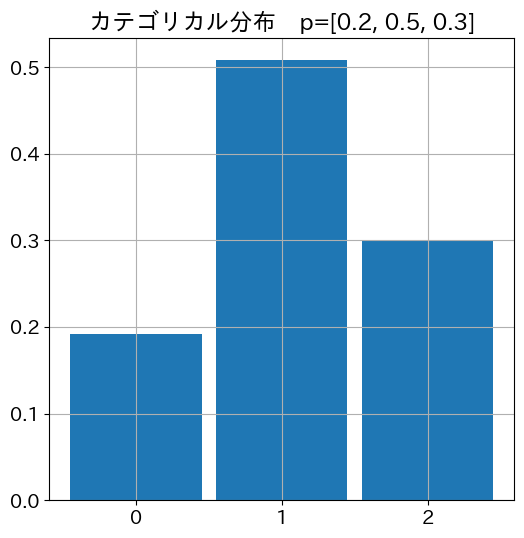

In [6]:
ax = az.plot_dist(x_samples1)
ax.set_title(f'カテゴリカル分布　p={p}');

### A.2 ディリクレ分布

#### 確率モデル定義

In [7]:
# パラメータ設定
n_components = 3

model2 = pm.Model()
with model2:
    # ディリクレ分布
    # a:パラメータ　[1, 1, 1]だと一様分布
    p = pm.Dirichlet('p', a=np.ones(n_components))

#### 事前分布のサンプリングとサンプル値抽出

In [8]:
with model2:
    # サンプル値取得
    samples2 = pm.sample_prior_predictive(random_seed=42)

# サンプル値抽出
x_samples2 = samples2['prior']['p'].values
# 桁数が多いので先頭10個だけに限定
print(x_samples2[:,:10])

Sampling: [p]


[[[0.298 0.562 0.141]
  [0.075 0.880 0.046]
  [0.011 0.033 0.956]
  [0.020 0.007 0.974]
  [0.157 0.796 0.046]
  [0.430 0.539 0.031]
  [0.111 0.534 0.355]
  [0.206 0.483 0.311]
  [0.837 0.062 0.101]
  [0.539 0.416 0.045]]]


#### サンプリング結果の可視化

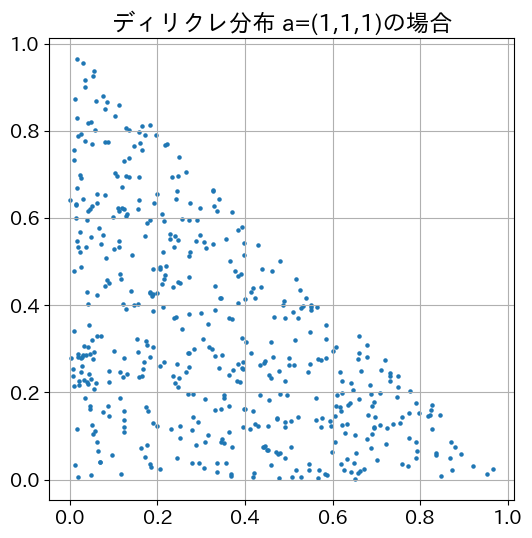

In [9]:
# サンプル値の可視化
samples2 = x_samples2.reshape(-1,3)
plt.title('ディリクレ分布 a=(1,1,1)の場合')
x1 = samples2[:,0]
x2 = samples2[:,1]
plt.scatter(x1,x2, s=5);

### A.3 3クラス潜在変数モデル

#### データ読み込み

In [10]:
# アイリスデータセットの読み込み
df = sns.load_dataset('iris')

# 先頭5行の確認
display(df.head())

#  speciesの分布確認
df['species'].value_counts()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.100,3.500,1.400,0.200,setosa
1,4.900,3.000,1.400,0.200,setosa
2,4.700,3.200,1.300,0.200,setosa
3,4.600,3.100,1.500,0.200,setosa
4,5.000,3.600,1.400,0.200,setosa


species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

#### 変数設定

In [11]:
#  観測値データ
X = df['petal_width'].values

#  データ件数
N = X.shape

# 分類先クラス数
n_components = 3

#### 確率モデル定義

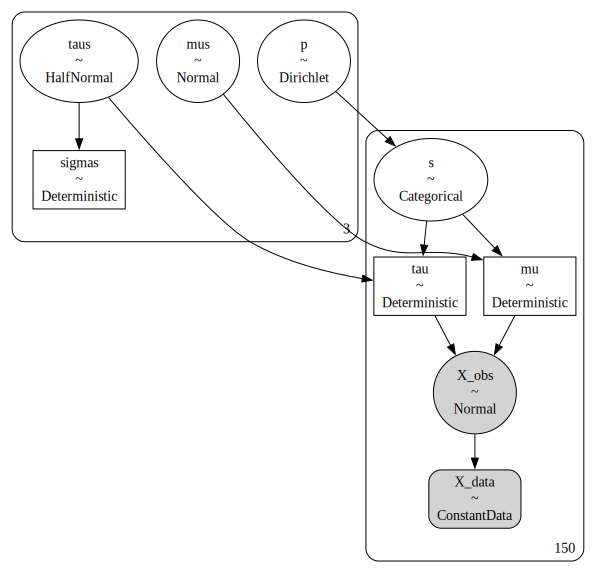

In [12]:
model3 = pm.Model()

with model3:
    #  観測値をpm.ConstantDataで定義する
    X_data = pm.ConstantData('X_data', X)

    # p:  それぞれの値を取るの確率を示す3要素のベクトル
    p = pm.Dirichlet('p', a=np.ones(n_components))

    # s: pの確率値を基に0, 1, 2のいずれかの値を返す
    s = pm.Categorical('s', p=p, shape=N)

    # mus: 3つの花の種類毎の平均値
    mus = pm.Normal('mus', mu=0.0, sigma=10.0, shape=n_components)

    # taus: 3つの花の種類毎のバラツキ
    # 標準偏差sigmasとは　taus = 1/(sigmas*sigmas) の関係にある
    taus = pm.HalfNormal('taus', sigma=10.0, shape=n_components)

    # グラフ描画など分析でsigmaが必要なため、tauからsigmaを求めておく
    sigmas = pm.Deterministic('sigmas', 1/pm.math.sqrt(taus))

    # 各観測値ごとに潜在変数からmuとtauを求める
    mu = pm.Deterministic('mu', mus[s])
    tau = pm.Deterministic('tau', taus[s])

    # 正規分布に従う確率変数X_obsの定義
    X_obs = pm.Normal('X_obs', mu=mu, tau=tau, observed=X_data)

# モデル構造可視化
g = pm.model_to_graphviz(model3)
display(g);

#### サンプリング

In [13]:
with model3:
    idata3 = pm.sample(
      chains=1, draws=2000, target_accept=0.99,
      random_seed=42)

Sequential sampling (1 chains in 1 job)
CompoundStep
>NUTS: [p, mus, taus]
>CategoricalGibbsMetropolis: [s]


Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 69 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


#### 推論結果の確認

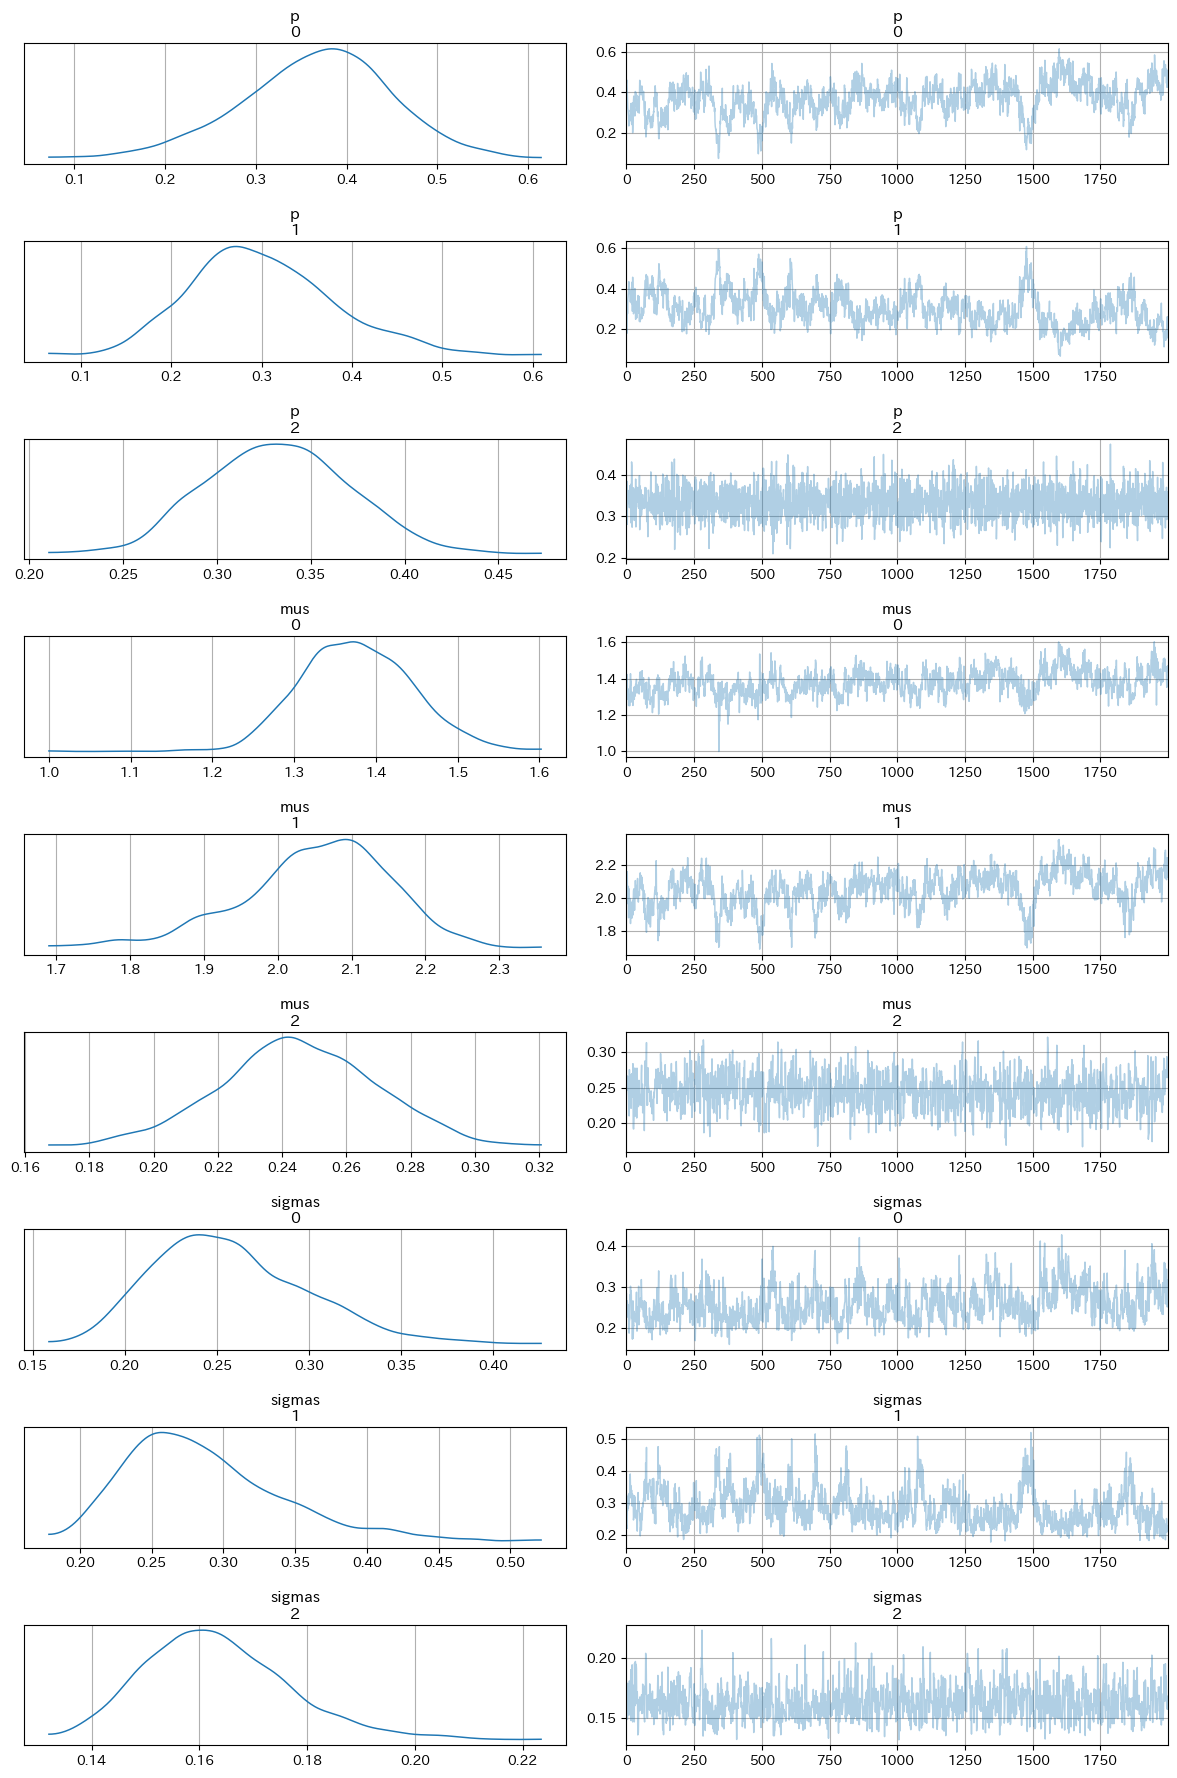

In [14]:
az.plot_trace(idata3, var_names=['p', 'mus', 'sigmas'], compact=False)
plt.tight_layout();

#### 統計処理の集計

In [15]:
summary3 = az.summary(idata3, var_names=['p', 'mus', 'sigmas'])
display(summary3)

arviz - WARNING - Shape validation failed: input_shape: (1, 2000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p[0],0.366,0.082,0.208,0.518,0.015,0.012,26.000,71.000,NaN
p[1],0.301,0.082,0.169,0.471,0.015,0.011,27.000,61.000,NaN
p[2],0.333,0.038,0.264,0.401,0.001,0.000,3805.000,1551.000,NaN
mus[0],1.377,0.068,1.252,1.502,0.016,0.012,20.000,107.000,NaN
mus[1],2.050,0.105,1.859,2.254,0.019,0.014,24.000,68.000,NaN
mus[2],0.245,0.024,0.202,0.294,0.001,0.001,920.000,1112.000,NaN
sigmas[0],0.258,0.042,0.186,0.335,0.006,0.004,52.000,253.000,NaN
sigmas[1],0.288,0.057,0.196,0.400,0.007,0.005,47.000,219.000,NaN
sigmas[2],0.163,0.014,0.139,0.188,0.000,0.000,836.000,819.000,NaN


#### ヒストグラムと推論結果の重ね描き

c:\Users\treme\.conda\envs\pymc_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\treme\.conda\envs\pymc_env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\treme\.conda\envs\pymc_env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\treme\.conda\envs\pymc_env\Lib\site-packages\seaborn\_oldcore.py:1

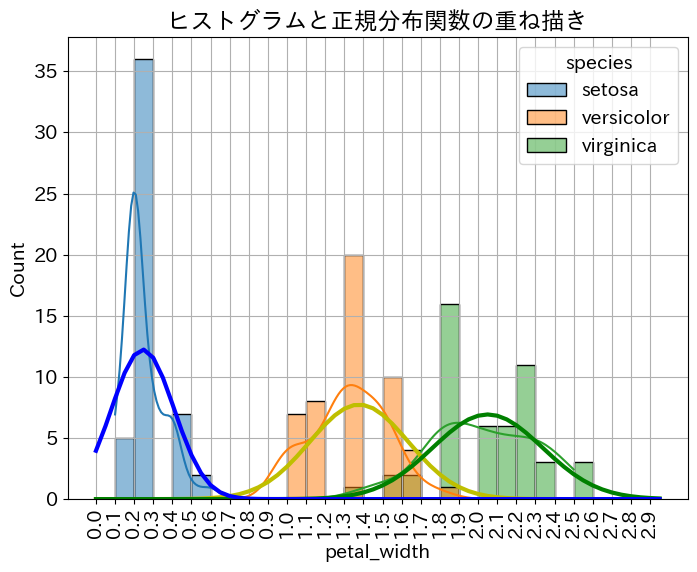

In [16]:
# 正規分布関数の定義
def norm(x, mu, sigma):
    return np.exp(-((x - mu)/sigma)**2/2) / (np.sqrt(2 * np.pi) * sigma)

# 推論結果から各パラメータの平均値を取得
mean3 = summary3['mean']

# muの平均値取得
mean3_mu0 = mean3['mus[0]']
mean3_mu1 = mean3['mus[1]']
mean3_mu2 = mean3['mus[2]']

# sigmaの平均値取得
mean3_sigma0 = mean3['sigmas[0]']
mean3_sigma1 = mean3['sigmas[1]']
mean3_sigma2 = mean3['sigmas[2]']

# グラフ描画
x = np.arange(0.0, 3.0, 0.05)
plt.rcParams['figure.figsize']=(8,6)
fig, ax = plt.subplots()
sns.histplot(
    data=df,
    bins=np.arange(0.0, 3.0, 0.1),
    x='petal_width',
    hue='species', kde=True)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.title('petal_widthのヒストグラム')
plt.xticks(np.arange(0.0, 3.0, 0.1));
plt.title('ヒストグラムと正規分布関数の重ね描き')
plt.plot(x, norm(x, mean3_mu0, mean3_sigma0)*5.0, c='y', lw=3)
plt.plot(x, norm(x, mean3_mu1, mean3_sigma1)*5.0, c='g', lw=3)
plt.plot(x, norm(x, mean3_mu2, mean3_sigma2)*5.0, c='b', lw=3);

### A.4 3クラス潜在変数モデル(失敗例)

#### 確率モデル定義

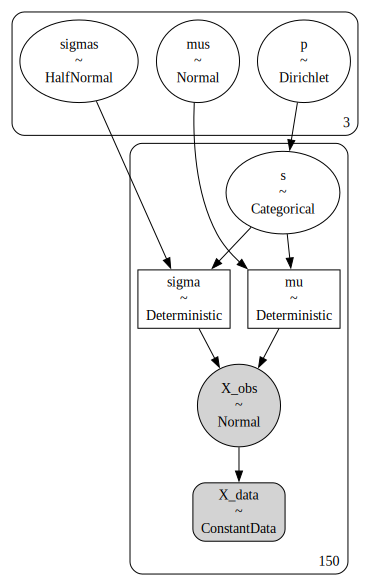

In [17]:
model4 = pm.Model()

with model4:
    #  観測値をpm.ConstantDataで定義する
    X_data = pm.ConstantData('X_data', X)

    # p:  それぞれの値を取るの確率を示す3要素のベクトル
    p = pm.Dirichlet('p', a=np.ones(n_components))

    # s: pの確率値を基に0, 1, 2のいずれかの値を返す
    s = pm.Categorical('s', p=p, shape=N)

    # mus: 3つの花の種類毎の平均値
    mus = pm.Normal('mus', mu=0.0, sigma=10.0, shape=n_components)

    # taus: 3つの花の種類毎のバラツキ
    # 標準偏差sigmasとは　taus = 1/(sigmas*sigmas) の関係にある
    sigmas = pm.HalfNormal('sigmas', sigma=10.0, shape=n_components)

    # 各観測値ごとに潜在変数からmuとtauを求める
    mu = pm.Deterministic('mu', mus[s])
    sigma = pm.Deterministic('sigma', sigmas[s])

    # mu[s], tau[s]: 潜在変数による参照
    X_obs = pm.Normal('X_obs', mu=mu, sigma=sigma, observed=X_data)

# モデル構造可視化
g = pm.model_to_graphviz(model4)
display(g);

#### サンプリングと推論結果の確認

Sequential sampling (1 chains in 1 job)
CompoundStep
>NUTS: [p, mus, sigmas]
>CategoricalGibbsMetropolis: [s]


Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 166 seconds.
There were 1756 divergences after tuning. Increase `target_accept` or reparameterize.
Only one chain was sampled, this makes it impossible to run some convergence checks


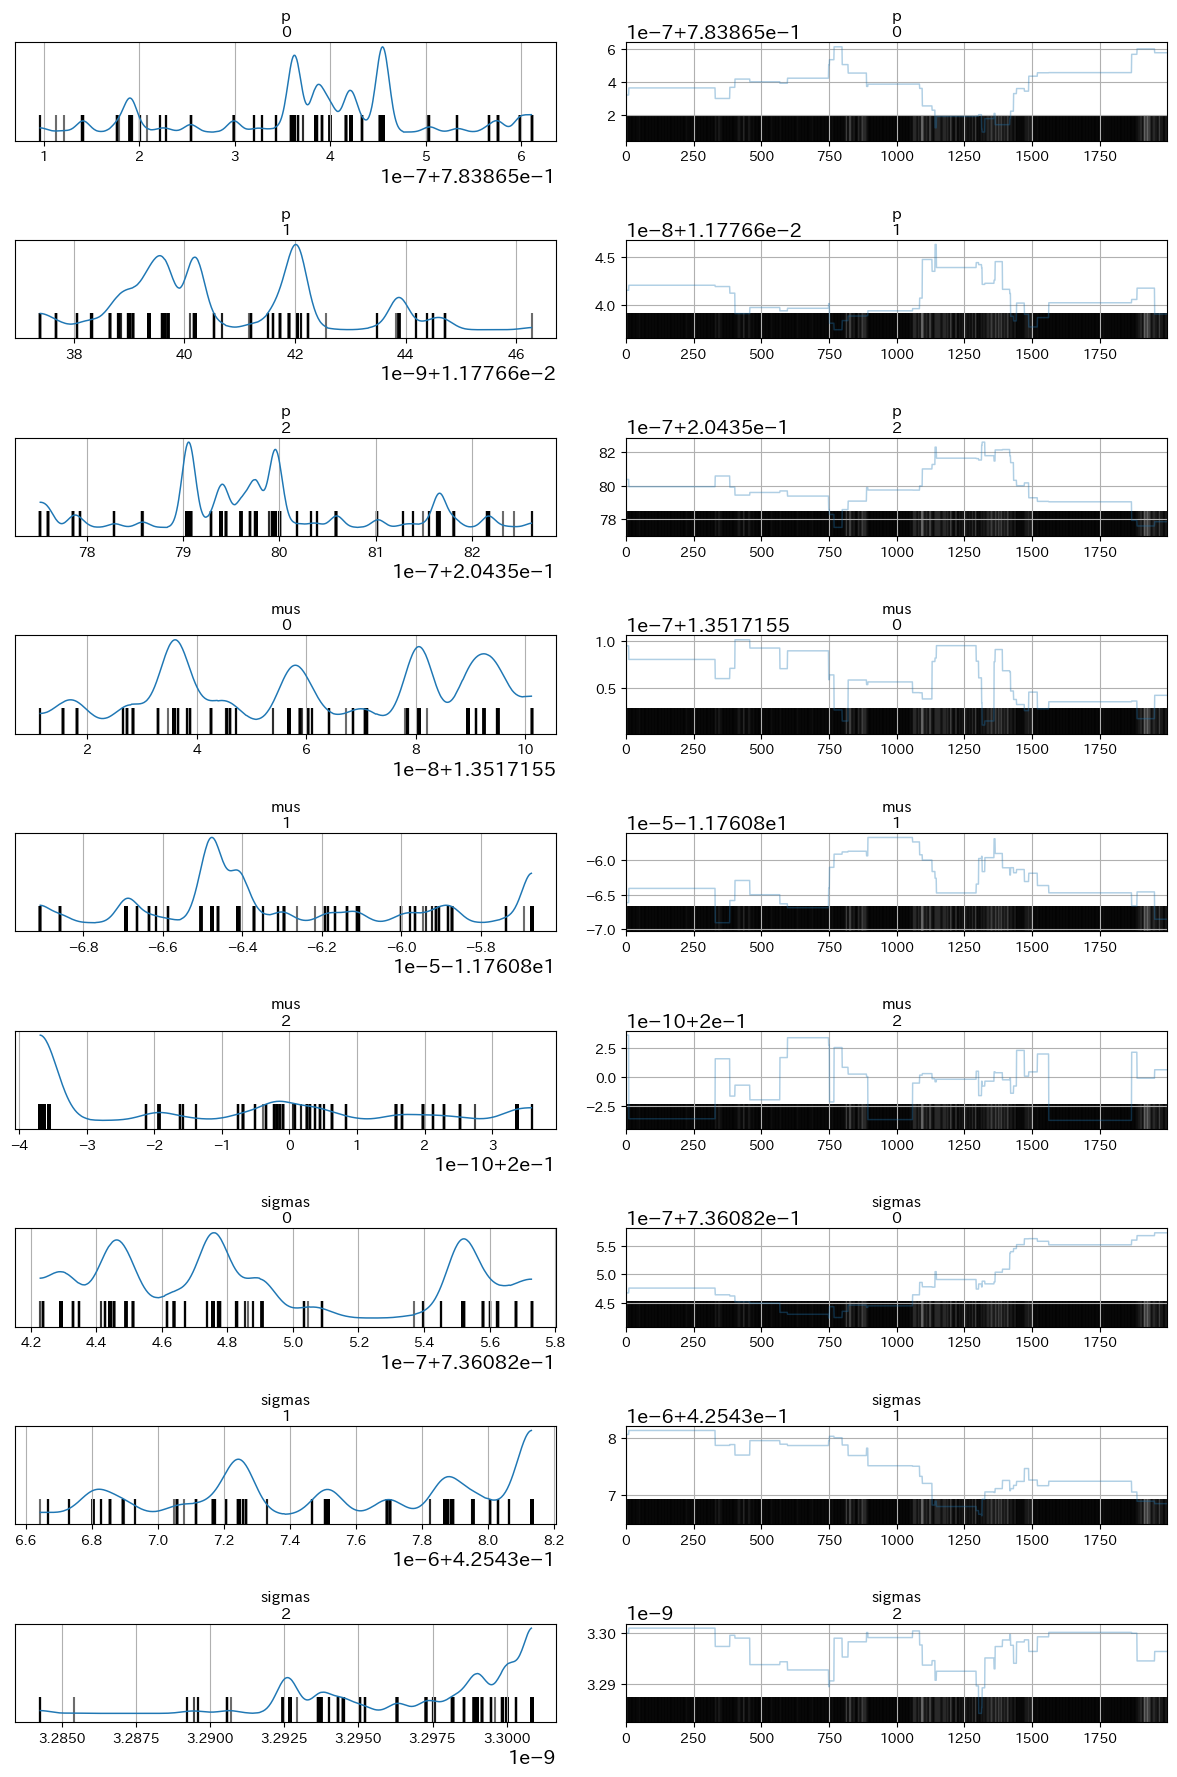

In [18]:
with model4:
    idata4 = pm.sample(
      chains=1, draws=2000, target_accept=0.99,
      random_seed=42)

az.plot_trace(idata4, var_names=['p', 'mus', 'sigmas'], compact=False)
plt.tight_layout();

### A.5 3クラス潜在モデル(改良版)

#### 確率モデル定義

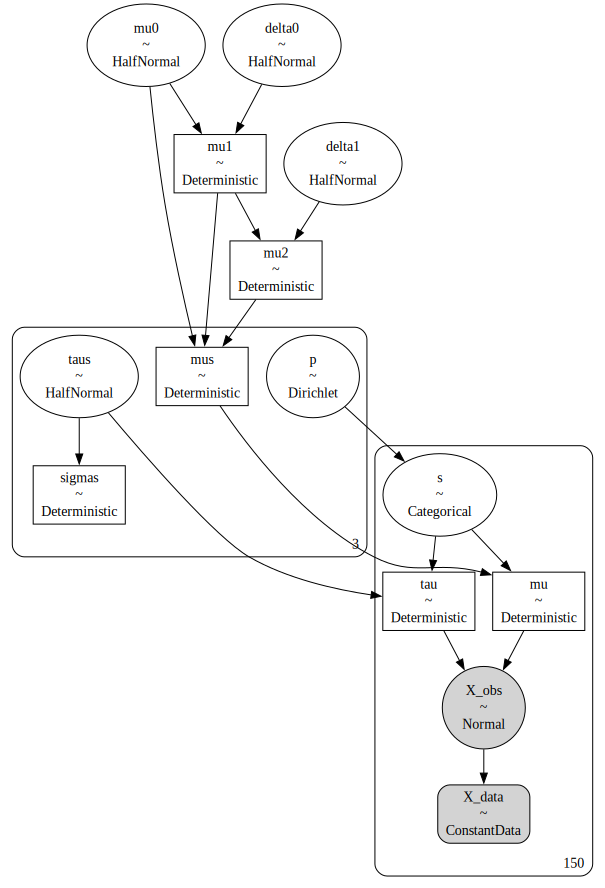

In [19]:
model5 = pm.Model()

with model5:
    #  観測値をpm.ConstantDataで定義する
    X_data = pm.ConstantData('X_data', X)

    # p:  それぞれの値を取るの確率を示す3要素のベクトル
    p = pm.Dirichlet('p', a=np.ones(n_components))

    # s: pの確率値を基に0, 1, 2のいずれかの値を返す
    s = pm.Categorical('s', p=p, shape=N)

    # mus: 3つの花の種類毎の平均値
    mu0 = pm.HalfNormal('mu0', sigma=10.0)
    delta0 = pm.HalfNormal('delta0', sigma=10.0)
    mu1 = pm.Deterministic('mu1', mu0+delta0)
    delta1 = pm.HalfNormal('delta1', sigma=10.0)
    mu2 = pm.Deterministic('mu2', mu1+delta1)
    mus = pm.Deterministic('mus', pm.math.stack([mu0, mu1, mu2]))

    # taus: 3つの花の種類毎のバラツキ
    # 標準偏差sigmasとは　taus = 1/(sigmas*sigmas) の関係にある
    taus = pm.HalfNormal('taus', sigma=10.0, shape=n_components)

    # グラフ描画など分析でsigmaが必要なため、tauからsigmaを求めておく
    sigmas = pm.Deterministic('sigmas', 1/pm.math.sqrt(taus))

    # 各観測値ごとに潜在変数からmuとtauを求める
    mu = pm.Deterministic('mu', mus[s])
    tau = pm.Deterministic('tau', taus[s])

    # mu[s], tau[s]: 潜在変数による参照
    X_obs = pm.Normal('X_obs', mu=mu, tau=tau, observed=X_data)

# モデル構造可視化
g = pm.model_to_graphviz(model5)
display(g);

#### サンプリングと推計結果の確認

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [p, mu0, delta0, delta1, taus]
>CategoricalGibbsMetropolis: [s]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 105 seconds.
c:\Users\treme\.conda\envs\pymc_env\Lib\site-packages\arviz\stats\diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


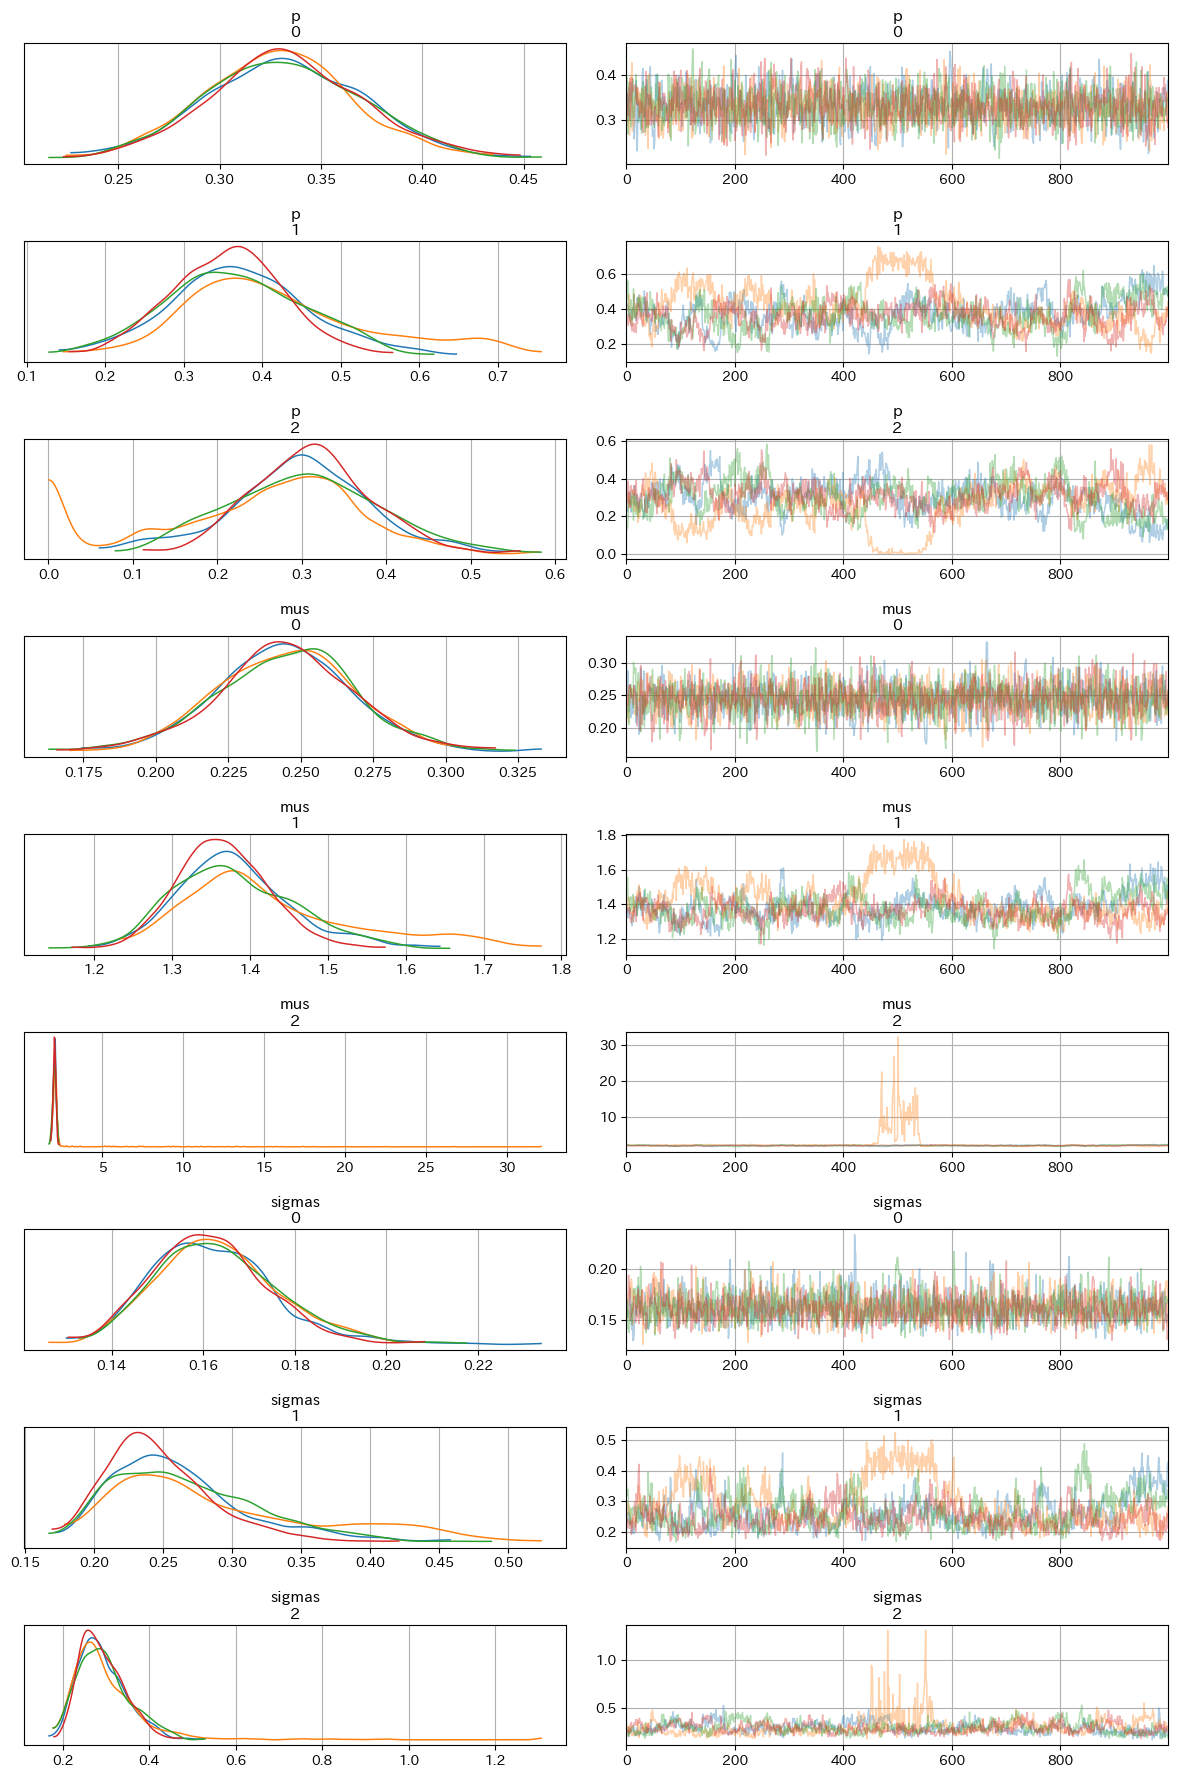

In [20]:
with model5:
    idata5 = pm.sample(target_accept=0.99, random_seed=42)

plt.rcParams['figure.figsize']=(6,6)
az.plot_trace(idata5, var_names=['p', 'mus', 'sigmas'], compact=False)
plt.tight_layout();

#### 統計処理の集計

In [21]:
summary5 = az.summary(idata5, var_names=['p', 'mus', 'sigmas'])
display(summary5)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p[0],0.332,0.038,0.259,0.401,0.001,0.001,2471.000,2413.000,1.000
p[1],0.378,0.097,0.185,0.557,0.017,0.012,34.000,51.000,1.080
p[2],0.290,0.095,0.107,0.476,0.016,0.011,40.000,50.000,1.080
mus[0],0.245,0.023,0.197,0.285,0.000,0.000,2272.000,2196.000,1.000
mus[1],1.389,0.088,1.249,1.571,0.015,0.011,40.000,55.000,1.070
mus[2],2.197,1.310,1.823,2.259,0.140,0.099,41.000,74.000,1.080
sigmas[0],0.163,0.013,0.139,0.187,0.000,0.000,2227.000,1751.000,1.000
sigmas[1],0.267,0.058,0.175,0.382,0.009,0.007,51.000,59.000,1.060
sigmas[2],0.296,0.070,0.197,0.407,0.006,0.004,85.000,340.000,1.040


#### ヒストグラムと推論結果の重ね描き

c:\Users\treme\.conda\envs\pymc_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\treme\.conda\envs\pymc_env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\treme\.conda\envs\pymc_env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\treme\.conda\envs\pymc_env\Lib\site-packages\seaborn\_oldcore.py:1

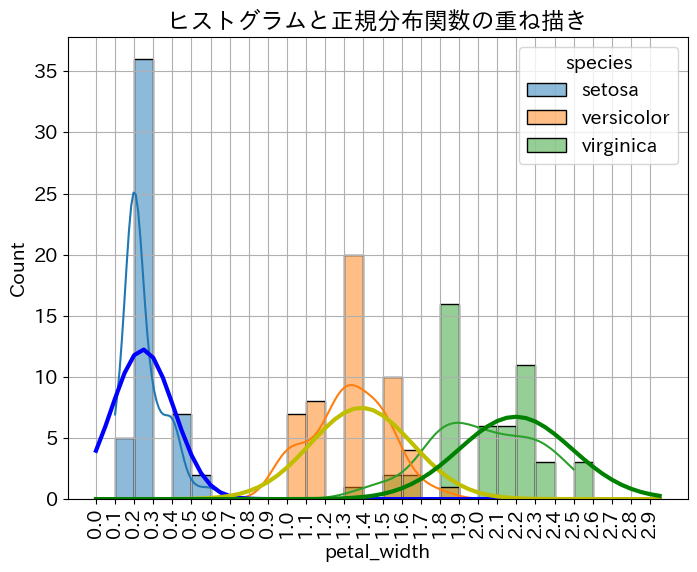

In [22]:
# 推論結果から各パラメータの平均値を取得
mean5 = summary5['mean']

# muの平均値取得
mean5_mu0 = mean5['mus[0]']
mean5_mu1 = mean5['mus[1]']
mean5_mu2 = mean5['mus[2]']

# sigmaの平均値取得
mean5_sigma0 = mean5['sigmas[0]']
mean5_sigma1 = mean5['sigmas[1]']
mean5_sigma2 = mean5['sigmas[2]']

# グラフ描画
x = np.arange(0.0, 3.0, 0.05)
plt.rcParams['figure.figsize']=(8,6)
fig, ax = plt.subplots()
sns.histplot(
    data=df,
    bins=np.arange(0.0, 3.0, 0.1),
    x='petal_width',
    hue='species', kde=True)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.title('petal_widthのヒストグラム')
plt.xticks(np.arange(0.0, 3.0, 0.1));
plt.title('ヒストグラムと正規分布関数の重ね描き')
plt.plot(x, norm(x, mean5_mu0, mean5_sigma0)*5.0, c='b', lw=3)
plt.plot(x, norm(x, mean5_mu1, mean5_sigma1)*5.0, c='y', lw=3)
plt.plot(x, norm(x, mean5_mu2, mean5_sigma2)*5.0, c='g', lw=3);